In [680]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from datetime import date
import time

In [681]:
print(f"This Notebook was sucessfully run till end on {date.today()}")

This Notebook was sucessfully run till end on 2025-05-21


In [804]:
pd.set_option('display.max_columns', None)

In [846]:
path = "/Users/aryagupta/Desktop/food-delivery-estimation/food_time_prediction_using_mlops/data/raw/train.csv"

data = pd.read_csv(path)
data = data.drop([45593], axis = 0) # contains all null value

In [847]:
data.sample(10)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
27991,0x7e42,HYDRES11DEL02,22,4.6,17.430448,78.418213,17.510448,78.498213,20-03-2022,21:25:00,21:30:00,conditions Windy,Jam,1.0,Buffet,motorcycle,1,No,Urban,(min) 26
31571,0x1d2e,HYDRES11DEL01,25,4.8,17.430448,78.418213,17.540448,78.528213,27-03-2022,21:40:00,21:50:00,conditions Sandstorms,Jam,1.0,Snack,scooter,0,No,Urban,(min) 25
38447,0x8eb8,BANGRES05DEL02,25,4,12.970324,77.645748,13.020324,77.695748,03-04-2022,20:50:00,21:05:00,conditions Cloudy,Jam,1.0,Drinks,motorcycle,1,No,Metropolitian,(min) 31
15322,0x57b7,JAPRES18DEL03,20,4.7,26.913987,75.752891,26.973987,75.812891,21-03-2022,20:15:00,20:30:00,conditions Sunny,Jam,2.0,Snack,scooter,0,No,Urban,(min) 14
34071,0x4b57,VADRES03DEL03,35,4.9,22.320000,73.170000,22.410000,73.260000,02-04-2022,17:55:00,18:00:00,conditions Sunny,Medium,2.0,Drinks,scooter,1,No,Urban,(min) 25
22559,0x9fe1,INDORES11DEL03,29,5,22.751234,75.889490,22.811234,75.949490,21-03-2022,19:20:00,19:35:00,conditions Windy,Jam,0.0,Buffet,motorcycle,1,No,Metropolitian,(min) 35
535,0xe076,AGRRES02DEL03,38,4.1,0.000000,0.000000,0.090000,0.090000,16-02-2022,20:15:00,20:25:00,conditions Sandstorms,Jam,2.0,Snack,scooter,2,No,Metropolitian,(min) 38
31769,0x7531,SURRES05DEL01,36,4.6,21.175104,72.804342,21.215104,72.844342,03-04-2022,12:10:00,12:20:00,conditions Fog,High,1.0,Meal,motorcycle,1,No,Metropolitian,(min) 31
28151,0x4132,HYDRES04DEL03,38,4.7,17.411028,78.329645,17.471028,78.389645,28-03-2022,21:00:00,21:15:00,conditions Cloudy,Jam,1.0,Snack,scooter,1,No,Metropolitian,(min) 31
31829,0x425d,JAPRES17DEL01,NaN,NaN,26.892312,75.806896,27.002312,75.916896,29-03-2022,NaN,19:10:00,conditions Sunny,Medium,0.0,Buffet,motorcycle,1,No,Metropolitian,(min) 19


In [848]:
data.rename(
    columns={
        "ID" : 'id',
        "Delivery_person_ID": "rider_id", 
        "Delivery_person_Age": "age", 
        "Delivery_person_Ratings": "ratings",
        "Delivery_location_latitude": "delivery_latitude",
        "Delivery_location_longitude": "delivery_longitude",
        "Time_Orderd": "order_time",
        "Weatherconditions": "weather",
        "Road_traffic_density": "traffic",
        "Type_of_order": "order_type",  
        "Type_of_vehicle": "vehicle_type", 
        "City": "city_category",
        "Time_taken(min)": "time",
        'Time_Order_picked' : 'pickup_time',
        'Festival' : 'is_festival',
    },
    inplace=True
)

In [849]:
data.columns = data.columns.str.lower()

In [850]:
print(f" Rows in dataset = {data.shape[0]}")
print(f" Columns in dataset = {data.shape[1]}")

 Rows in dataset = 45593
 Columns in dataset = 20


In [851]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    45593 non-null  object 
 1   rider_id              45593 non-null  object 
 2   age                   45593 non-null  object 
 3   ratings               45593 non-null  object 
 4   restaurant_latitude   45593 non-null  float64
 5   restaurant_longitude  45593 non-null  float64
 6   delivery_latitude     45593 non-null  float64
 7   delivery_longitude    45593 non-null  float64
 8   order_date            45593 non-null  object 
 9   order_time            45593 non-null  object 
 10  pickup_time           45593 non-null  object 
 11  weather               45593 non-null  object 
 12  traffic               45593 non-null  object 
 13  vehicle_condition     45593 non-null  float64
 14  order_type            45593 non-null  object 
 15  vehicle_type       

In [852]:
# checking null
data.isna().sum()

id                      0
rider_id                0
age                     0
ratings                 0
restaurant_latitude     0
restaurant_longitude    0
delivery_latitude       0
delivery_longitude      0
order_date              0
order_time              0
pickup_time             0
weather                 0
traffic                 0
vehicle_condition       0
order_type              0
vehicle_type            0
multiple_deliveries     0
is_festival             0
city_category           0
time                    0
dtype: int64

We can see here that there are Zero na values in our dataset but when we actually look in the dataset then we can see that there are some missing values. The reason for this is that missing values are in **"nan"** and **not in np.nan** format

### Investigating Missing Values

In [853]:
data.sample(5)

,id,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,order_time,pickup_time,weather,traffic,vehicle_condition,order_type,vehicle_type,multiple_deliveries,is_festival,city_category,time
31127,0xb8af,JAPRES12DEL01,27,4.9,26.902908,75.792934,26.972908,75.862934,23-03-2022,22:25:00,22:30:00,conditions Cloudy,Low,2.0,Meal,scooter,1,No,Metropolitian,(min) 24
43956,0xdd32,ALHRES08DEL01,28,5,25.450329,81.834279,25.460329,81.844279,17-02-2022,11:00:00,11:10:00,conditions Fog,Low,0.0,Buffet,motorcycle,1,No,Metropolitian,(min) 20
12884,0xa477,HYDRES12DEL01,31,4.8,17.429585,78.392621,17.499585,78.462621,12-03-2022,20:40:00,20:50:00,conditions Fog,Jam,0.0,Meal,motorcycle,0,No,Metropolitian,(min) 42
20618,0xe05f,AURGRES02DEL02,36,4.5,0.000000,0.000000,0.130000,0.130000,14-02-2022,18:25:00,18:40:00,conditions Cloudy,Medium,0.0,Snack,motorcycle,1,Yes,Urban,(min) 47
513,0x9692,JAPRES17DEL02,39,4.9,26.892312,75.806896,26.972313,75.886896,14-03-2022,21:15:00,21:25:00,conditions Windy,Jam,0.0,Snack,motorcycle,2,No,Urban,(min) 43


In [854]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    45593 non-null  object 
 1   rider_id              45593 non-null  object 
 2   age                   45593 non-null  object 
 3   ratings               45593 non-null  object 
 4   restaurant_latitude   45593 non-null  float64
 5   restaurant_longitude  45593 non-null  float64
 6   delivery_latitude     45593 non-null  float64
 7   delivery_longitude    45593 non-null  float64
 8   order_date            45593 non-null  object 
 9   order_time            45593 non-null  object 
 10  pickup_time           45593 non-null  object 
 11  weather               45593 non-null  object 
 12  traffic               45593 non-null  object 
 13  vehicle_condition     45593 non-null  float64
 14  order_type            45593 non-null  object 
 15  vehicle_type       

In [855]:
def clean_data_types(data):

    # ID Feature
    data['id'] = data['id'].replace("NaN", np.nan)

    # person_id
    data['rider_id'] = data['rider_id'].replace("NaN", np.nan)

    # age
    data['age'] = data['age'].replace("NaN", np.nan)
    data['age'] = data['age'].astype('float').round()
    
    # ratings
    data['ratings'] = data['ratings'].replace("NaN", np.nan)
    data['ratings'] = data['ratings'].astype('float')

    # restaurant_latitude
    data['restaurant_latitude'] = data['restaurant_latitude'].replace("NaN", np.nan)

    # restaurant_longitude
    data['restaurant_longitude'] = data['restaurant_longitude'].replace("NaN", np.nan)

    # delivery_latitude
    data['delivery_latitude'] = data['delivery_latitude'].replace("NaN", np.nan)

    # delivery_longitude
    data['delivery_longitude'] = data['delivery_longitude'].replace("NaN", np.nan)

    # order_date
    data['order_date'] = pd.to_datetime(data['order_date'])

    # time_ordered
    data['order_time'] = data['order_time'].replace("NaN", np.nan)
    data['order_time'] = pd.to_datetime(data['order_time'], errors='coerce')

    # order_picked
    data['pickup_time'] = pd.to_datetime(data['pickup_time'])

    # weather
    data['weather'] = data['weather'].str.replace("weather ", '')
    data['weather'] = data['weather'].replace("NaN", np.nan)

    # traffic
    data['traffic'] = data['traffic'].replace("NaN ", np.nan)

    # vehical_condition
    data['vehicle_condition'] = data['vehicle_condition'].replace("NaN", np.nan)
    data['vehicle_condition'] = data['vehicle_condition'].astype('Int64')

    # order_type
    data['order_type'] = data['order_type'].replace("NaN ", np.nan)

    # type_of_vehicle
    data['vehicle_type'] = data['vehicle_type'].replace("NaN ", np.nan)

    # multiple_deliveries
    data['multiple_deliveries'] = data['multiple_deliveries'].replace("NaN ", np.nan)
    data['multiple_deliveries'] = data['multiple_deliveries'].astype('float')

    # festival
    data['is_festival'] = data['is_festival'].replace("NaN ", np.nan)

    # city
    data['city_category'] = data['city_category'].replace("NaN ", np.nan)

    # time
    data['time'] = data['time'].str.replace(r"\(min\)", "", regex=True)
    data['time'] = data['time'].astype('int')

    return data

clean_data_types(data)

/var/folders/vr/nc9jvld12q115x_g_114k8g40000gn/T/ipykernel_31606/2949396402.py:30: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['order_date'] = pd.to_datetime(data['order_date'])
/var/folders/vr/nc9jvld12q115x_g_114k8g40000gn/T/ipykernel_31606/2949396402.py:34: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['order_time'] = pd.to_datetime(data['order_time'], errors='coerce')
/var/folders/vr/nc9jvld12q115x_g_114k8g40000gn/T/ipykernel_31606/2949396402.py:37: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['pickup_time'] = pd.to_datetime(data['pickup_time'])


,id,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,order_time,pickup_time,weather,traffic,vehicle_condition,order_type,vehicle_type,multiple_deliveries,is_festival,city_category,time
0,0x4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,2025-05-21 11:30:00,2025-05-21 11:45:00,conditions Sunny,High,2,Snack,motorcycle,0.0,No,Urban,24
1,0xb379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,2025-05-21 19:45:00,2025-05-21 19:50:00,conditions Stormy,Jam,2,Snack,scooter,1.0,No,Metropolitian,33
2,0x5d6d,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,2025-05-21 08:30:00,2025-05-21 08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1.0,No,Urban,26
3,0x7a6a,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,2025-05-21 18:00:00,2025-05-21 18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,21
4,0x70a2,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,2025-05-21 13:30:00,2025-05-21 13:45:00,conditions Cloudy,High,1,Snack,scooter,1.0,No,Metropolitian,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0x7c09,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,2025-05-21 11:35:00,2025-05-21 11:45:00,conditions Windy,High,1,Meal,motorcycle,0.0,No,Metropolitian,32
45589,0xd641,AGRRES16DEL01,21.0,4.6,0.000000,0.000000,0.070000,0.070000,2022-02-16,2025-05-21 19:55:00,2025-05-21 20:10:00,conditions Windy,Jam,0,Buffet,motorcycle,1.0,No,Metropolitian,36
45590,0x4f8d,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,2025-05-21 23:50:00,2025-05-21 00:05:00,conditions Cloudy,Low,1,Drinks,scooter,0.0,No,Metropolitian,16
45591,0x5eee,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,2025-05-21 13:35:00,2025-05-21 13:40:00,conditions Cloudy,High,0,Snack,motorcycle,1.0,No,Metropolitian,26


In [815]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    45593 non-null  object        
 1   rider_id              45593 non-null  object        
 2   age                   43739 non-null  float64       
 3   ratings               43685 non-null  float64       
 4   restaurant_latitude   45593 non-null  float64       
 5   restaurant_longitude  45593 non-null  float64       
 6   delivery_latitude     45593 non-null  float64       
 7   delivery_longitude    45593 non-null  float64       
 8   order_date            45593 non-null  datetime64[ns]
 9   order_time            43862 non-null  datetime64[ns]
 10  pickup_time           45593 non-null  datetime64[ns]
 11  weather               45593 non-null  object        
 12  traffic               44992 non-null  object        
 13  vehicle_conditio

In [856]:
# Missing values
pd.DataFrame(data.isna().sum())

,0
id,0
rider_id,0
age,1854
ratings,1908
restaurant_latitude,0
restaurant_longitude,0
delivery_latitude,0
delivery_longitude,0
order_date,0
order_time,1731


In [857]:
# total missing value in entire data
data.isna().sum().sum()

np.int64(8515)

<Axes: >

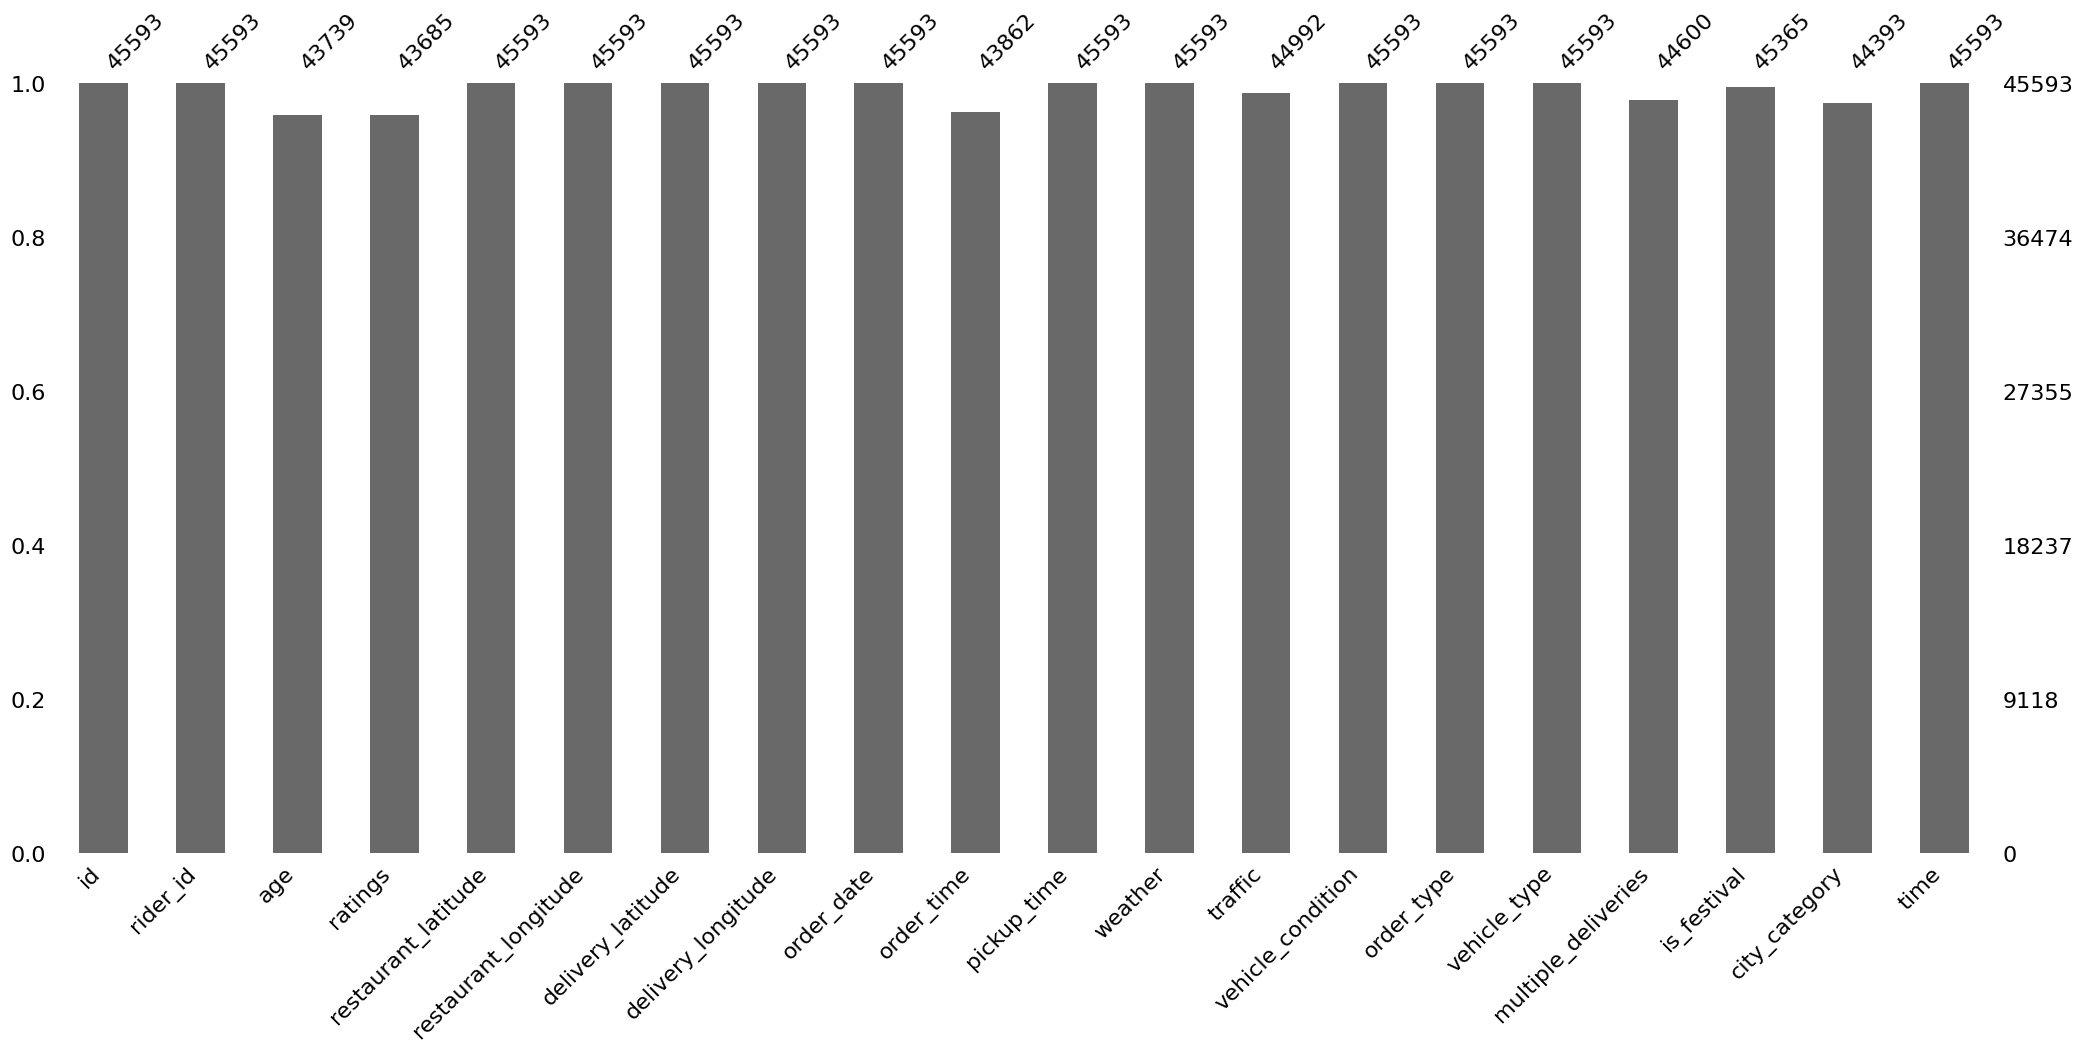

In [858]:
# visualise missing value
msno.bar(data)

<Axes: >

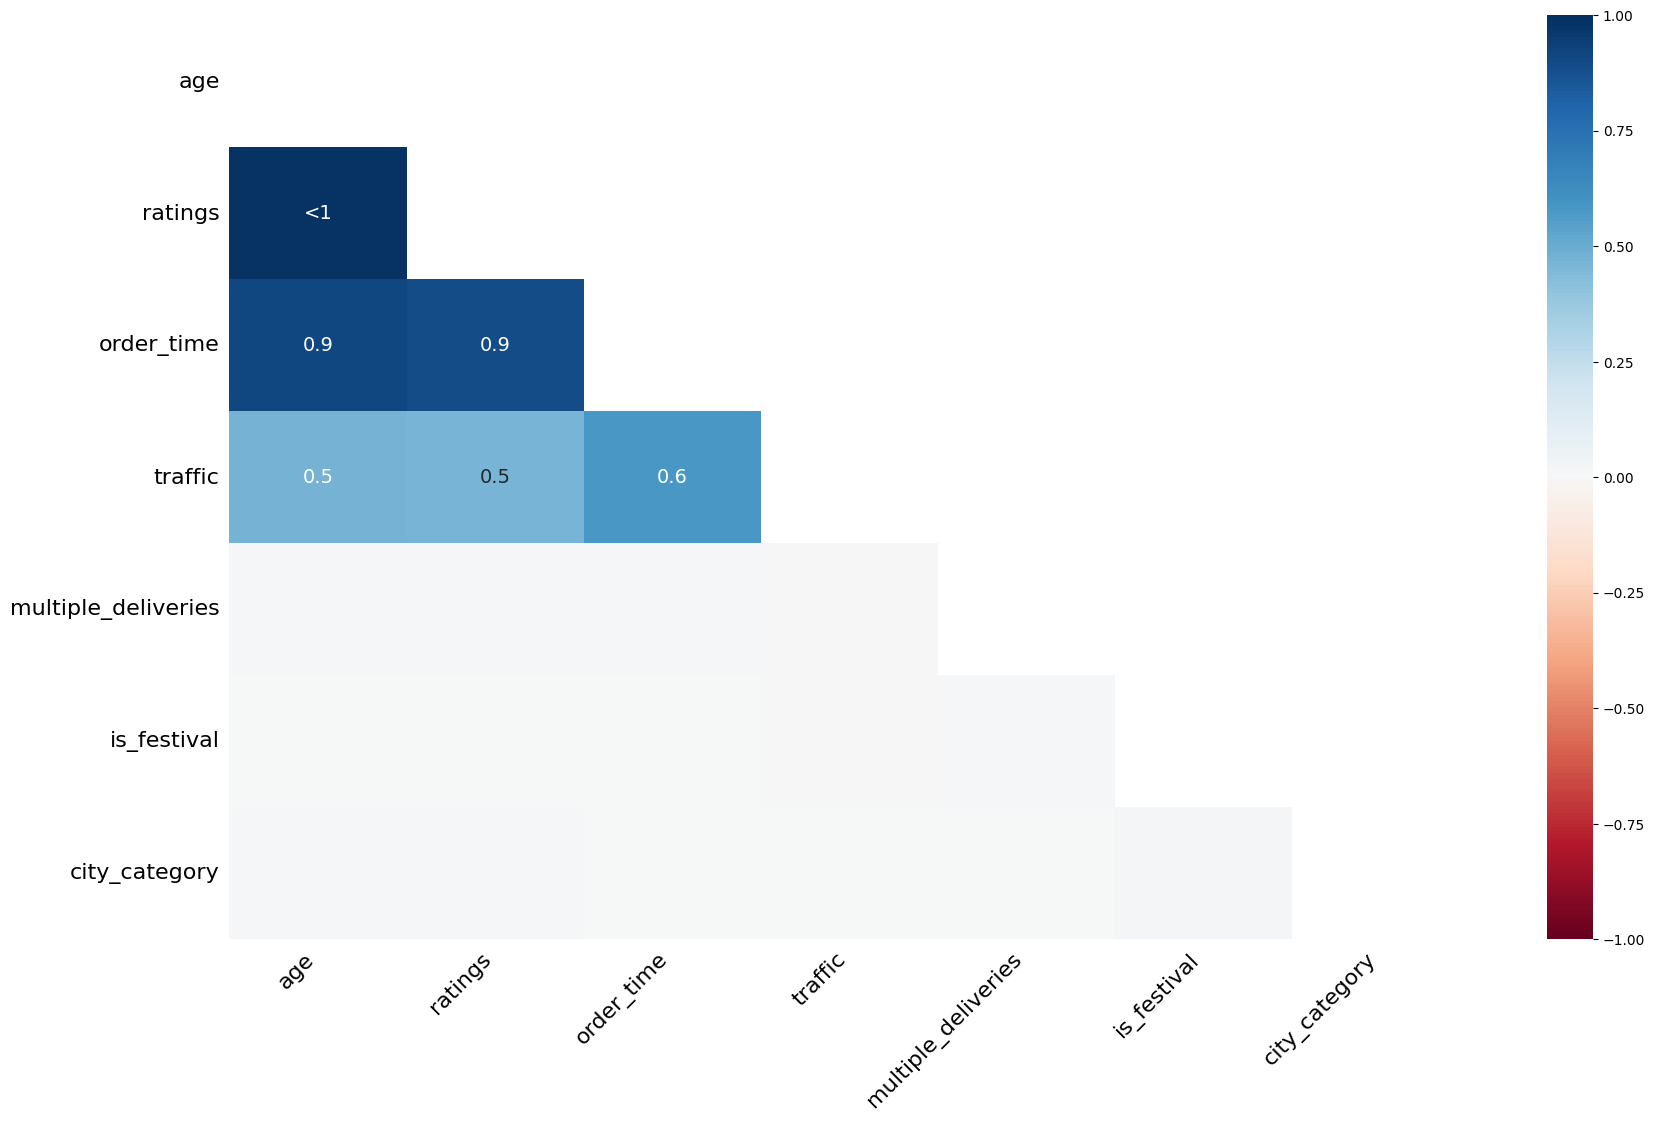

In [859]:
# visualise missing value
msno.heatmap(data)

<Axes: >

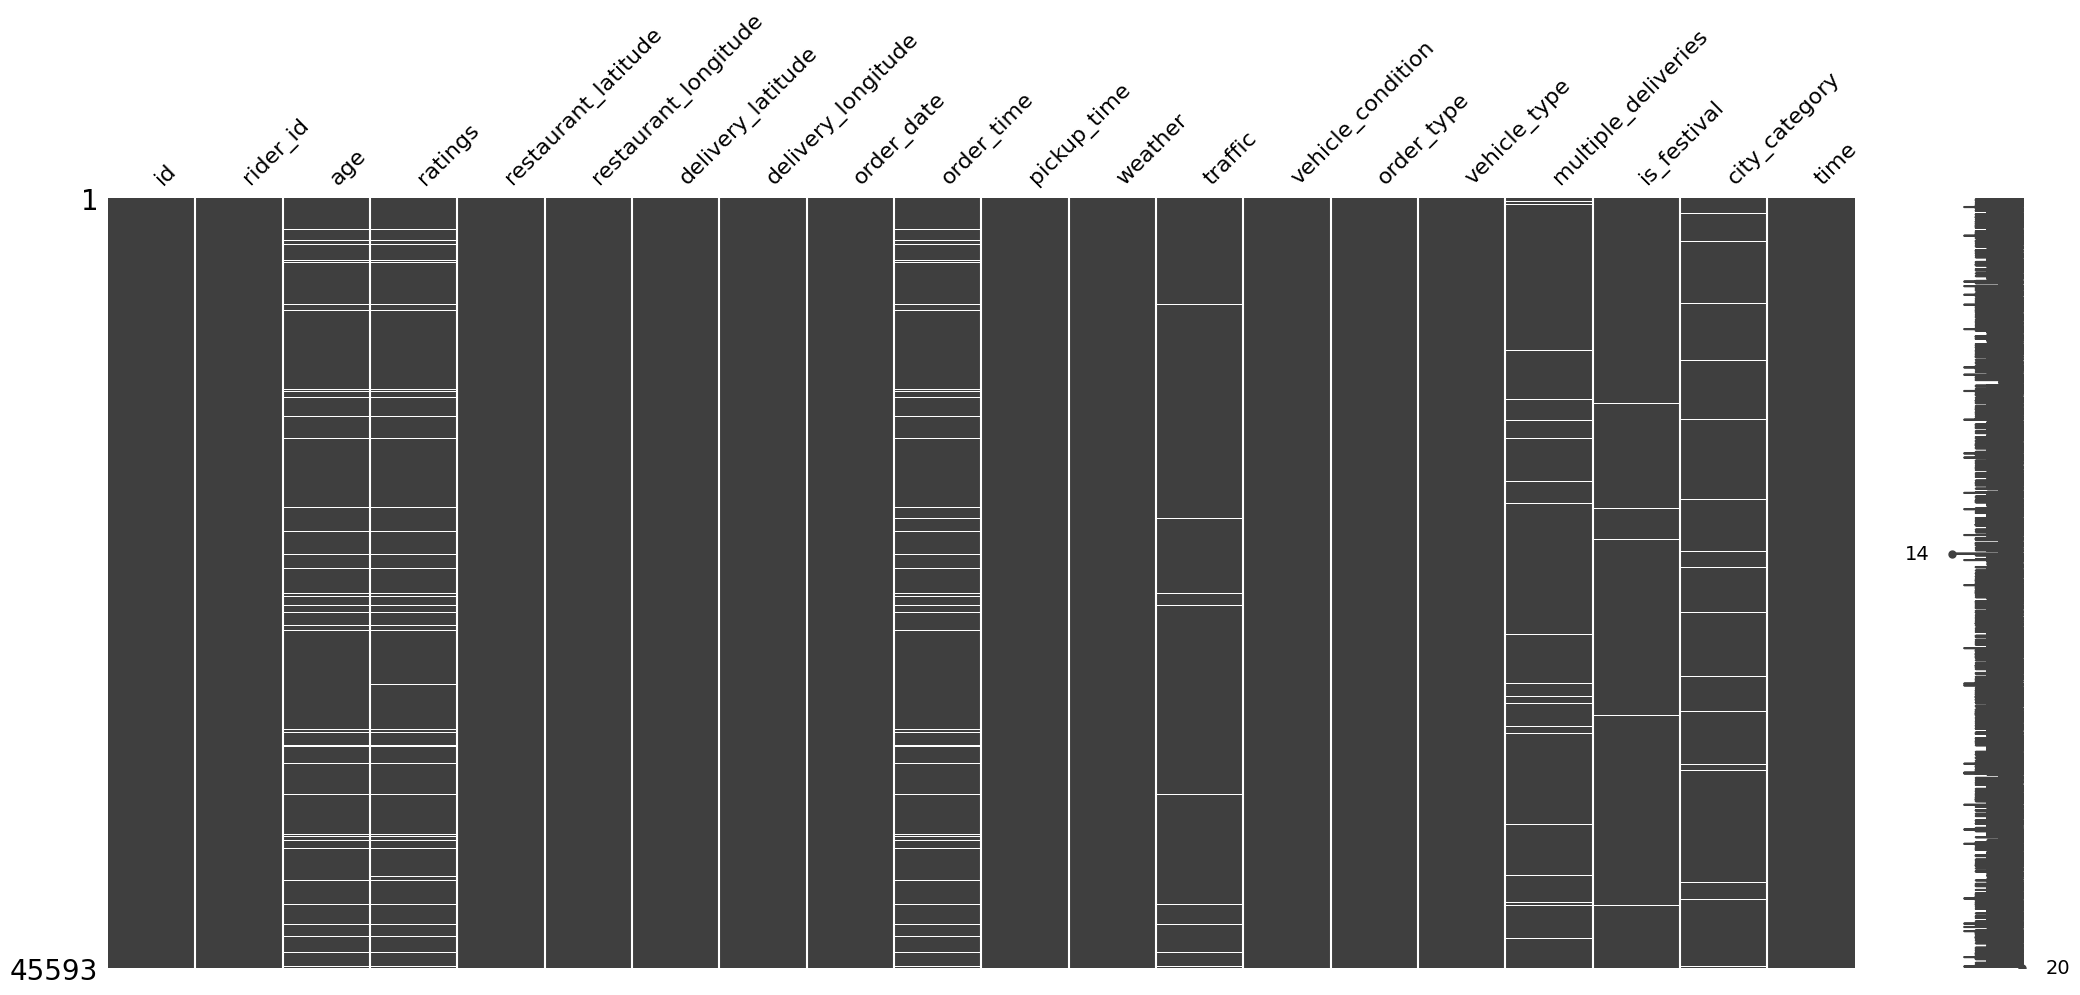

In [860]:
# visualise missing value
msno.matrix(data)

<Axes: >

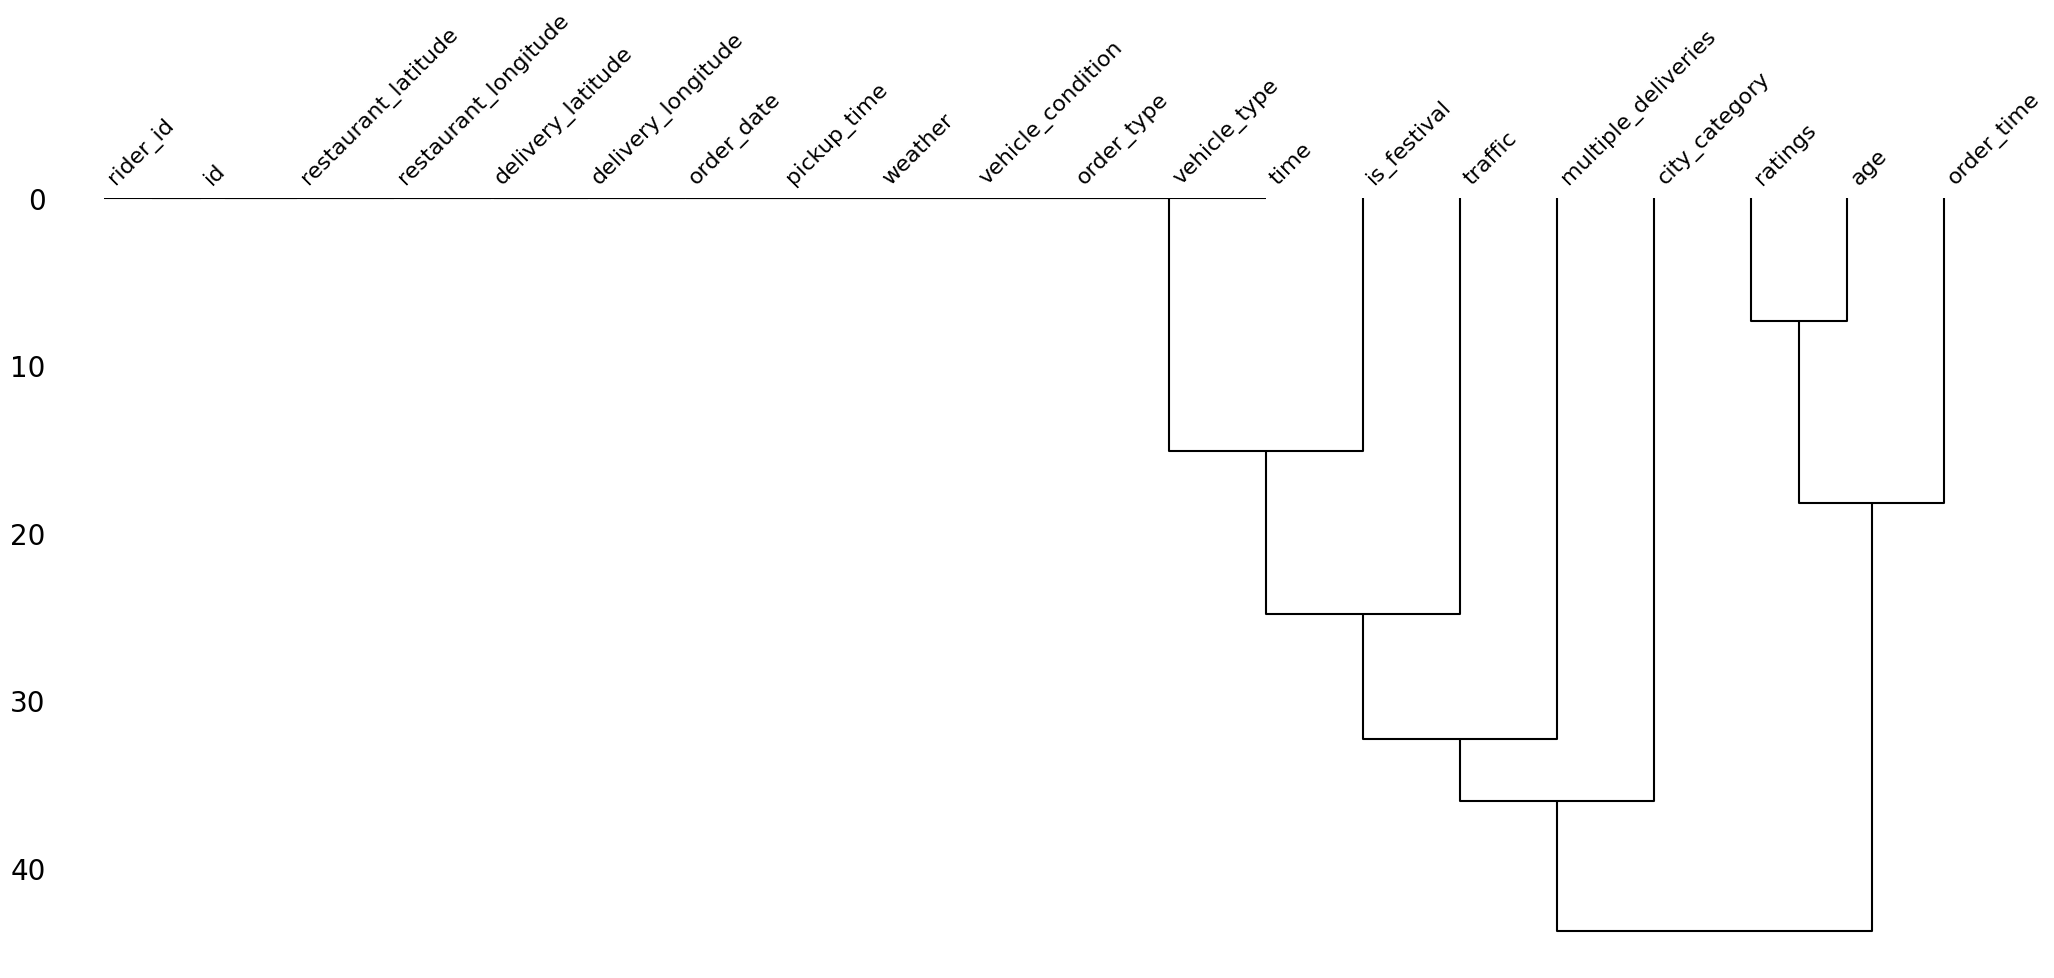

In [861]:
msno.dendrogram(data)

### Key Observations:

### Indivisual Column data cleaning

#### id

In [822]:
print(data.shape[0])
data['id'].nunique()

45593


45593

So we can clearly see that all values in id column are unique and therefore we must drop it.

In [823]:
data.drop('id', axis = 1, inplace = True)

#### rider_id

In [862]:
data['rider_id'].sample(5)

23379    RANCHIRES09DEL03 
14765       VADRES02DEL02 
20730      CHENRES17DEL02 
23978     COIMBRES16DEL02 
35479      CHENRES02DEL03 
Name: rider_id, dtype: object

We can clearly see that This feature contains the city name inside it which we need to seprate out

In [825]:
data['city'] = data['rider_id'].str.split('RES').str.get(0)

In [826]:
top_city = pd.DataFrame(data['city'].value_counts().head())

In [827]:
top_city

,count
city,
JAP,3443
RANCHI,3229
BANG,3195
SUR,3187
HYD,3181


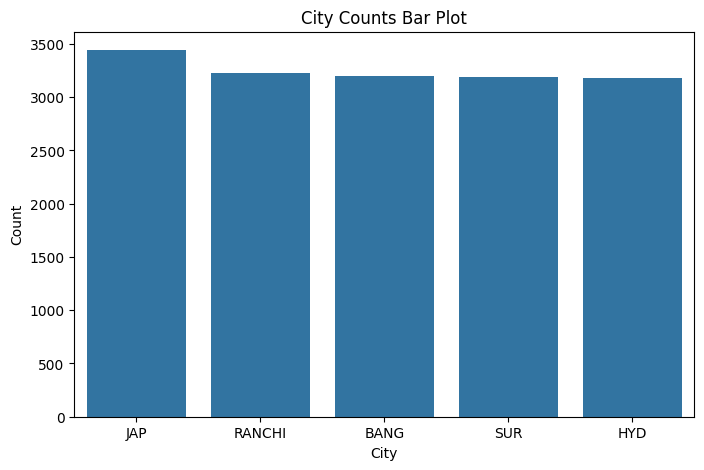

In [828]:
plt.figure(figsize=(8, 5))
sns.barplot(x=top_city.index, y=top_city['count'])
plt.title('City Counts Bar Plot')
plt.xlabel('City')
plt.ylabel('Count')
plt.show()

#### age

In [863]:
data['age'].nunique()

22

In [864]:
pd.DataFrame(data['age'].describe())

,age
count,43739.000000
mean,29.567137
std,5.815155
min,15.000000
25%,25.000000
50%,30.000000
75%,35.000000
max,50.000000


The minimum age is 15 which needs further investigation as it is not legal age to work in India.

In [865]:
age_equal_15 = data[data['age'] == 15]
age_equal_15

,id,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,order_time,pickup_time,weather,traffic,vehicle_condition,order_type,vehicle_type,multiple_deliveries,is_festival,city_category,time
2387,0x564,JAPRES15DEL03,15.0,1.0,-26.891191,75.802083,26.981191,75.892083,2022-03-12,NaT,2025-05-21 17:20:00,conditions NaN,NaN,3,Meal,motorcycle,0.0,No,Urban,15
2905,0xcd0,INDORES010DEL03,15.0,1.0,22.750040,75.902847,22.810040,75.962847,2022-04-03,NaT,2025-05-21 20:30:00,conditions NaN,NaN,3,Snack,scooter,1.0,No,Metropolitian,29
2951,0x91a,SURRES17DEL03,15.0,1.0,21.149569,72.772697,21.209569,72.832697,2022-03-21,NaT,2025-05-21 22:10:00,conditions NaN,NaN,3,Buffet,bicycle,1.0,No,Metropolitian,20
5902,0x474,CHENRES15DEL03,15.0,1.0,13.026286,80.275235,13.056286,80.305235,2022-03-11,NaT,2025-05-21 20:50:00,conditions NaN,NaN,3,Drinks,bicycle,1.0,No,Metropolitian,25
9156,0x73f,BANGRES05DEL01,15.0,1.0,12.970324,77.645748,13.080324,77.755748,2022-03-25,NaT,2025-05-21 23:25:00,conditions NaN,NaN,3,Buffet,motorcycle,2.0,No,Metropolitian,34
10900,0x1b49,MUMRES14DEL02,15.0,1.0,19.181300,72.836191,19.231300,72.886191,2022-03-30,NaT,2025-05-21 20:55:00,conditions NaN,NaN,3,Buffet,motorcycle,1.0,No,Metropolitian,39
11125,0x40b,SURRES12DEL01,15.0,1.0,-21.183434,-72.814492,21.193434,72.824492,2022-03-05,NaT,2025-05-21 11:30:00,conditions NaN,NaN,3,Meal,scooter,1.0,No,Urban,27
12093,0x523,INDORES03DEL02,15.0,1.0,22.751857,75.866699,22.801857,75.916699,2022-03-24,NaT,2025-05-21 21:15:00,conditions NaN,NaN,3,Buffet,bicycle,0.0,No,Metropolitian,28
15124,0x18b0,RANCHIRES02DEL01,15.0,1.0,0.000000,0.000000,0.070000,0.070000,2022-03-16,NaT,2025-05-21 23:55:00,conditions NaN,NaN,3,Meal,bicycle,1.0,No,Metropolitian,21
15927,0x550,CHENRES08DEL02,15.0,1.0,13.022394,80.242439,13.072394,80.292439,2022-03-11,NaT,2025-05-21 18:10:00,conditions NaN,NaN,3,Snack,bicycle,0.0,No,Metropolitian,17


Where `age` == 15 we can clearly see that there are many missing values in our data like `order_time`, `weather`, `traffic` also the value of `restaurant_latitude` are either 0 or negative which is not possible for India as it lies on the east side of the GMT.

In [866]:
data['age'].isna().sum()

np.int64(1854)

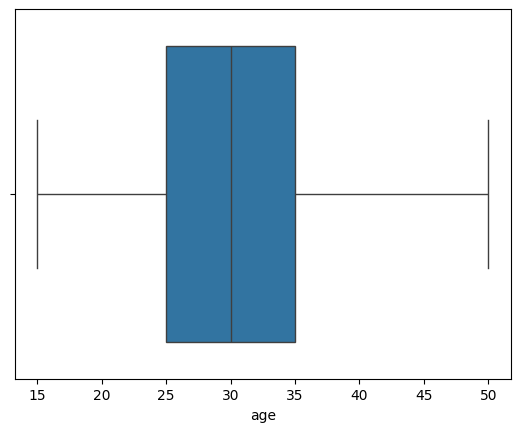

In [867]:
sns.boxplot(data = data, x = 'age')
plt.show()

In [834]:
def clean_age(data):
    data.drop(data[data['age'] == 15].index, inplace=True)
    return

clean_age(data)

#### ratings

In [868]:
pd.DataFrame(data['ratings'].describe())

,ratings
count,43685.000000
mean,4.633780
std,0.334716
min,1.000000
25%,4.500000
50%,4.700000
75%,4.900000
max,6.000000


In [869]:
six_star_ratings = data[data['ratings'] == 6]
six_star_ratings

,id,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,order_time,pickup_time,weather,traffic,vehicle_condition,order_type,vehicle_type,multiple_deliveries,is_festival,city_category,time
3586,0x46d,BANGRES05DEL01,50.0,6.0,-12.970324,-77.645748,13.010324,77.685748,2022-03-13,NaT,2025-05-21 12:30:00,conditions NaN,NaN,3,Meal,electric_scooter,0.0,No,Urban,25
4714,0x493,HYDRES17DEL01,50.0,6.0,-17.451976,-78.385883,17.561976,78.495883,2022-04-04,NaT,2025-05-21 23:20:00,conditions NaN,NaN,3,Snack,bicycle,0.0,No,Metropolitian,27
5169,0x4f2,JAPRES08DEL01,50.0,6.0,-26.910262,-75.783013,27.020262,75.893013,2022-03-18,NaT,2025-05-21 18:50:00,conditions NaN,NaN,3,Drinks,scooter,1.0,No,Metropolitian,20
5362,0x430,BANGRES19DEL01,50.0,6.0,12.914264,77.678400,13.024264,77.788400,2022-04-06,NaT,2025-05-21 20:55:00,conditions NaN,NaN,3,Meal,electric_scooter,1.0,No,Metropolitian,18
5651,0xbef1,AGRRES13DEL02,50.0,6.0,-27.159795,-78.042990,27.209795,78.092990,2022-02-13,NaT,2025-05-21 18:05:00,conditions NaN,NaN,3,Drinks,scooter,1.0,No,Metropolitian,20
6394,0x427,JAPRES06DEL02,50.0,6.0,26.911927,75.797282,27.041927,75.927282,2022-04-02,NaT,2025-05-21 22:10:00,conditions NaN,NaN,3,Meal,electric_scooter,0.0,No,Urban,20
7031,0x3eb,MYSRES15DEL02,50.0,6.0,-12.352058,-76.606650,12.372058,76.626650,2022-03-15,NaT,2025-05-21 10:00:00,conditions NaN,NaN,3,Buffet,scooter,1.0,No,Metropolitian,14
7681,0xd42,VADRES09DEL01,50.0,6.0,0.000000,0.000000,0.010000,0.010000,2022-03-21,NaT,2025-05-21 08:35:00,conditions NaN,NaN,3,Meal,bicycle,1.0,No,Metropolitian,22
9499,0x3f0,BANGRES010DEL01,50.0,6.0,12.933298,77.614293,13.003298,77.684293,2022-03-12,NaT,2025-05-21 18:25:00,conditions NaN,NaN,3,Drinks,scooter,1.0,No,Urban,17
9535,0x3ef,RANCHIRES13DEL01,50.0,6.0,-23.374989,-85.335486,23.444989,85.405486,2022-03-20,NaT,2025-05-21 17:55:00,conditions NaN,NaN,3,Snack,bicycle,1.0,No,Metropolitian,32


#### Key Observations:


In [870]:
data[data['ratings'] == 6].shape[0]

53

We will remove these rows which have `ratings` == 6

In [871]:
def clean_rating(data):
    data.drop(data[data['ratings'] == 6].index, inplace = True)

clean_rating(data)

In [872]:
data['ratings'].value_counts()

ratings
4.8    7148
4.7    7142
4.9    7041
4.6    6940
5.0    3996
4.5    3303
4.1    1430
4.2    1418
4.3    1409
4.4    1361
4.0    1077
3.5     249
3.8     228
3.7     225
3.6     207
3.9     197
1.0      38
3.4      32
3.1      29
3.2      29
3.3      25
2.6      22
2.7      22
2.5      20
2.8      19
2.9      19
3.0       6
Name: count, dtype: int64

<Axes: ylabel='ratings'>

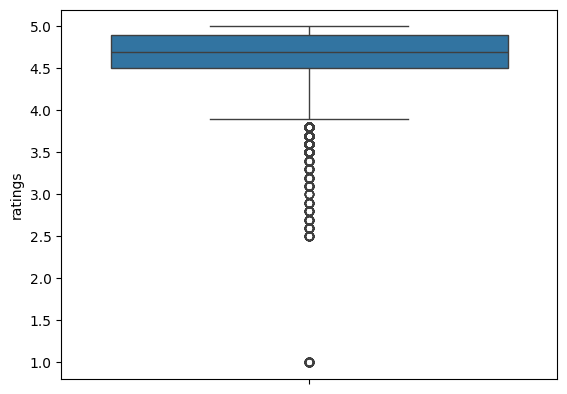

In [873]:
sns.boxplot(data['ratings'].astype(float))

#### Locations

In [874]:
loc = ['restaurant_latitude', 'restaurant_longitude', 'delivery_latitude', 'delivery_longitude']
loc_data = data[loc]

In [875]:
loc_data.sample(5)

,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude
17194,12.284747,76.625861,12.334747,76.675861
25368,26.905190,75.810753,26.945190,75.850753
19584,18.514210,73.838429,18.624210,73.948429
28141,23.359033,85.325347,23.399033,85.365347
27529,26.913483,75.803139,26.963483,75.853139


In [876]:
loc_data.describe()

,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude
count,45540.000000,45540.000000,45540.000000,45540.000000
mean,17.036839,70.303086,17.466449,70.848923
std,8.146609,22.665217,7.333616,21.111197
min,-30.905562,-88.352885,0.010000,0.010000
25%,12.933284,73.170283,12.988453,73.280000
50%,18.551440,75.898497,18.633934,76.002574
75%,22.728163,78.044095,22.785049,78.105546
max,30.914057,88.433452,31.054057,88.563452


#### Key Observations:

In [877]:
# set the lower bound limits for the lat and long
lower_bound_lat_ind = 6.44
lower_bound_long_ind = 68.70

In [878]:
# Filter rows where any latitude or longitude is below the bounds
filtered_rows = data[
    (data['restaurant_latitude'] < lower_bound_lat_ind) |
    (data['restaurant_longitude'] < lower_bound_long_ind) |
    (data['delivery_latitude'] < lower_bound_lat_ind) |
    (data['delivery_longitude'] < lower_bound_long_ind)
]

# Sample 50 rows
sampled_rows = filtered_rows.sample(50)
sampled_rows

,id,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,order_time,pickup_time,weather,traffic,vehicle_condition,order_type,vehicle_type,multiple_deliveries,is_festival,city_category,time
42438,0xc2d1,BHPRES19DEL01,32.0,4.9,0.000000,0.000000,0.110000,0.110000,2022-02-18,2025-05-21 18:40:00,2025-05-21 18:45:00,conditions Fog,Medium,1,Meal,scooter,0.0,No,Urban,30
43543,0xc007,BHPRES16DEL03,NaN,NaN,-23.264015,-77.408236,23.294015,77.438236,2022-02-15,NaT,2025-05-21 23:10:00,conditions Stormy,Low,2,Meal,scooter,1.0,No,Metropolitian,28
36686,0x5863,VADRES15DEL01,30.0,4.1,0.000000,0.000000,0.010000,0.010000,2022-03-13,2025-05-21 09:50:00,2025-05-21 10:05:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1.0,No,Metropolitian,28
5487,0x4d3c,VADRES12DEL03,33.0,4.2,0.000000,0.000000,0.060000,0.060000,2022-03-15,2025-05-21 20:25:00,2025-05-21 20:40:00,conditions Fog,Jam,1,Snack,motorcycle,1.0,No,Urban,34
28432,0x6c9,VADRES04DEL02,35.0,4.8,0.000000,0.000000,0.130000,0.130000,2022-04-06,2025-05-21 17:40:00,2025-05-21 17:50:00,conditions Cloudy,Medium,1,Buffet,motorcycle,1.0,No,Metropolitian,44
26568,0xd76d,ALHRES010DEL02,38.0,4.7,0.000000,0.000000,0.130000,0.130000,2022-02-12,2025-05-21 20:15:00,2025-05-21 20:20:00,conditions Sunny,Jam,1,Snack,motorcycle,1.0,No,Metropolitian,16
19613,0x22f3,VADRES04DEL02,27.0,5.0,0.000000,0.000000,0.080000,0.080000,2022-03-04,2025-05-21 22:50:00,2025-05-21 23:05:00,conditions Cloudy,Low,2,Buffet,motorcycle,0.0,No,Metropolitian,21
41626,0x177e,VADRES17DEL03,38.0,4.7,0.000000,0.000000,0.090000,0.090000,2022-03-14,2025-05-21 20:20:00,2025-05-21 20:25:00,conditions Cloudy,Jam,0,Drinks,motorcycle,0.0,No,Metropolitian,48
25082,0x9087,VADRES09DEL02,23.0,5.0,0.000000,0.000000,0.080000,0.080000,2022-03-16,2025-05-21 21:35:00,2025-05-21 21:50:00,conditions Fog,Jam,2,Buffet,scooter,1.0,No,Metropolitian,36
24023,0x51a,COIMBRES14DEL03,NaN,NaN,-11.003681,76.975525,11.063681,77.035525,2022-03-01,NaT,2025-05-21 21:15:00,conditions Sandstorms,Jam,2,Buffet,scooter,1.0,No,Metropolitian,19


In [879]:
# Filter rows with erroneous latitude or longitude values
erroneous_rows = loc_data[
    (loc_data['restaurant_latitude'] < lower_bound_lat_ind) |
    (loc_data['restaurant_longitude'] < lower_bound_long_ind) |
    (loc_data['delivery_latitude'] < lower_bound_lat_ind) |
    (loc_data['delivery_longitude'] < lower_bound_long_ind)
]

# Number of erroneous rows
num_erroneous_rows = erroneous_rows.shape[0]

print(num_erroneous_rows)

4042


In [880]:
# Filter problematic rows where lat/long is below the country's geographical limits
problematic_rows = loc_data[
    (loc_data['restaurant_latitude'] < lower_bound_lat_ind) |
    (loc_data['restaurant_longitude'] < lower_bound_long_ind) |
    (loc_data['delivery_latitude'] < lower_bound_lat_ind) |
    (loc_data['delivery_longitude'] < lower_bound_long_ind)
]

# Statistical summary of problematic rows
summary = problematic_rows.describe()

summary

,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude
count,4042.000000,4042.000000,4042.000000,4042.000000
mean,-2.061780,2.435898,2.124925,7.932102
std,6.427765,24.657521,6.428082,23.494804
min,-30.905562,-88.352885,0.010000,0.010000
25%,0.000000,0.000000,0.040000,0.040000
50%,0.000000,0.000000,0.070000,0.070000
75%,0.000000,0.000000,0.110000,0.110000
max,0.000000,88.433452,31.045562,88.523452


(array([1, 2, 3, 4]),
 [Text(1, 0, 'restaurant_latitude'),
  Text(2, 0, 'restaurant_longitude'),
  Text(3, 0, 'delivery_latitude'),
  Text(4, 0, 'delivery_longitude')])

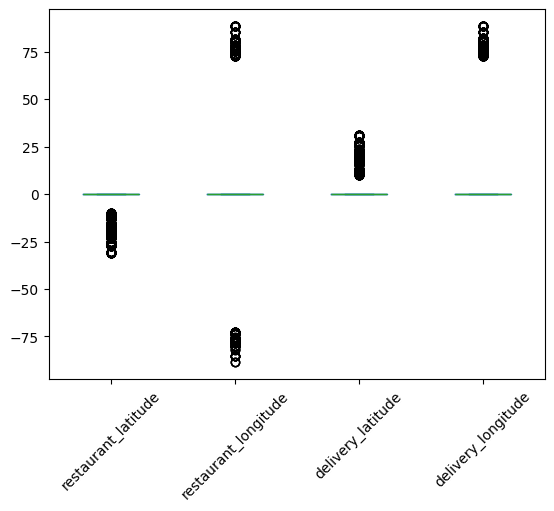

In [881]:
# Filter anomalies
filtered_anomalies = loc_data[
    (loc_data['restaurant_latitude'] < lower_bound_lat_ind) |
    (loc_data['restaurant_longitude'] < lower_bound_long_ind) |
    (loc_data['delivery_latitude'] < lower_bound_lat_ind) |
    (loc_data['delivery_longitude'] < lower_bound_long_ind)
]

# Create boxplots
filtered_anomalies.plot(kind="box")
plt.xticks(rotation=45)

[Text(1, 0, 'restaurant_latitude'),
 Text(2, 0, 'restaurant_longitude'),
 Text(3, 0, 'delivery_latitude'),
 Text(4, 0, 'delivery_longitude')]

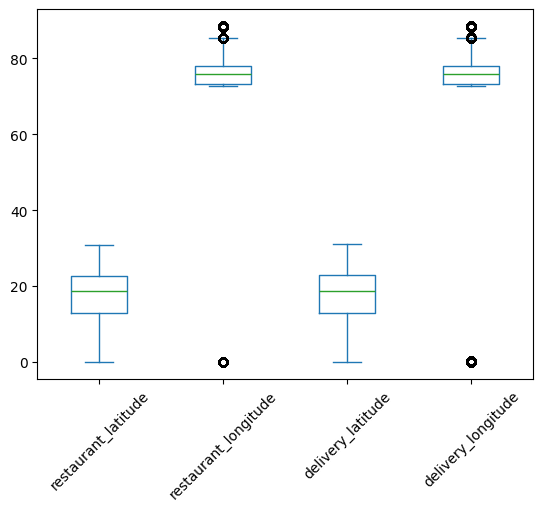

In [882]:
# taking the absolute values
(
    loc_data.abs()
    .plot(kind="box")
)

ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

In [883]:
# Take absolute values
abs_data = loc_data.abs()

# Filter rows based on conditions
filtered_data = abs_data[
    (abs_data['restaurant_latitude'] < lower_bound_lat_ind) |
    (abs_data['restaurant_longitude'] < lower_bound_long_ind) |
    (abs_data['delivery_latitude'] < lower_bound_lat_ind) |
    (abs_data['delivery_longitude'] < lower_bound_long_ind)
]

# Get the number of rows
num_rows = filtered_data.shape[0]

print(num_rows)

3633


**3640** rows in the data have **Messy latitude and longitude values**

In [884]:
# Filter problematic rows where lat/long is below the country's geographical limits
problematic_rows = loc_data[
    (loc_data['restaurant_latitude'] < lower_bound_lat_ind) |
    (loc_data['restaurant_longitude'] < lower_bound_long_ind) |
    (loc_data['delivery_latitude'] < lower_bound_lat_ind) |
    (loc_data['delivery_longitude'] < lower_bound_long_ind)
]

# Statistical summary of problematic rows
summary = problematic_rows.describe()

summary

,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude
count,4042.000000,4042.000000,4042.000000,4042.000000
mean,-2.061780,2.435898,2.124925,7.932102
std,6.427765,24.657521,6.428082,23.494804
min,-30.905562,-88.352885,0.010000,0.010000
25%,0.000000,0.000000,0.040000,0.040000
50%,0.000000,0.000000,0.070000,0.070000
75%,0.000000,0.000000,0.110000,0.110000
max,0.000000,88.433452,31.045562,88.523452


### Key Observations:
1. All the messy lat long values are less than 1

In [730]:
# Replacing all latitude and longitude values in the DataFrame that are below a given threshold with NaN.
def clean_lat_long(data: pd.DataFrame, threshold=1):
    location_columns = loc_data.columns.tolist()

    return (
        data
        .assign(**{
            col: (
                np.where(data[col] < threshold, np.nan, data[col].values)
            )
            for col in location_columns
        })
    )

clean_lat_long(data).isna().sum()

rider_id                   0
age                     1854
ratings                 1908
restaurant_latitude     4029
restaurant_longitude    3765
delivery_latitude       3630
delivery_longitude      3630
order_date                 0
order_time              1640
pickup_time                0
weather                    0
traffic                  510
vehicle_condition          0
order_type                 0
vehicle_type               0
multiple_deliveries      993
is_festival              228
city_category           1198
time                       0
city                       0
dtype: int64

#### **Order Date**

In [731]:
data['order_date'].sample(5)

20938   2022-03-30
37230   2022-03-13
41359   2022-03-16
31725   2022-03-19
3222    2022-03-04
Name: order_date, dtype: datetime64[ns]

In [732]:
data['order_date'].isna().sum()

np.int64(0)

In [733]:
data['order_date'].nunique()

44

In [734]:
# date range
order_date = pd.to_datetime(data['order_date'], dayfirst = True)
order_date.max() - order_date.min()

Timedelta('54 days 00:00:00')

In [735]:
# min and maximum dates
order_date.agg(["min", "max"]).set_axis(["start", "end"], axis = 0)

start   2022-02-11
end     2022-04-06
Name: order_date, dtype: datetime64[ns]

In [736]:
# extract day, day name, month and year
def extract_datetime_features(ser):
    date_col = pd.to_datetime(ser, dayfirst = True)

    return (
        pd.DataFrame(
            {
                "day": date_col.dt.day,
                "month": date_col.dt.month,
                "year": date_col.dt.year,
                "day_of_week": date_col.dt.day_name(),
                "is_weekend": date_col.dt.day_name().isin(["Saturday","Sunday"]).astype(int)
            }
        ))

extract_datetime_features(data['order_date'])

,day,month,year,day_of_week,is_weekend
0,19,3,2022,Saturday,1
1,25,3,2022,Friday,0
2,19,3,2022,Saturday,1
3,5,4,2022,Tuesday,0
4,26,3,2022,Saturday,1
...,...,...,...,...,...
45588,24,3,2022,Thursday,0
45589,16,2,2022,Wednesday,0
45590,11,3,2022,Friday,0
45591,7,3,2022,Monday,0


### **Order time and Order picked time**

In [737]:
# extract hour info from data
order_time_hr = pd.to_datetime(data.replace("NaN ", np.nan)['order_time'], format = 'mixed').dt.hour
order_time_hr

0        11.0
1        19.0
2         8.0
3        18.0
4        13.0
         ... 
45588    11.0
45589    19.0
45590    23.0
45591    13.0
45592    17.0
Name: order_time, Length: 45502, dtype: float64

In [738]:
def time_of_day(ser):
    time_col = pd.to_datetime(ser, format = 'mixed').dt.hour

    return(
        np.select(condlist=[(ser.between(6,12,inclusive='left')),
                            (ser.between(12,17,inclusive='left')),
                            (ser.between(17,20,inclusive='left')),
                            (ser.between(20,24,inclusive='left'))],
                  choicelist=["morning","afternoon","evening","night"],
                  default="after_midnight")
    )

In [739]:
time_subset = data.loc[:,["order_time","pickup_time"]]
time_subset.sample(5)

,order_time,pickup_time
7726,2025-05-21 22:30:00,2025-05-21 22:40:00
29849,2025-05-21 17:35:00,2025-05-21 17:50:00
39696,NaT,2025-05-21 00:05:00
6590,2025-05-21 09:10:00,2025-05-21 09:20:00
44279,2025-05-21 18:55:00,2025-05-21 19:05:00


In [740]:
time_subset.columns.tolist()

['order_time', 'pickup_time']

In [741]:
# calculate the pickup time
(
    time_subset
    .assign(**{
        col: pd.to_datetime(time_subset[col].replace("NaN ", np.nan).dropna(), format = "mixed")
        for col in time_subset.columns.tolist()}
    )
    .assign(
        pickup_time = lambda x: (x['pickup_time'] - x['order_time']).dt.seconds / 60,
        order_time_hour = lambda x: x['order_time'].dt.hour,
        order_time_of_day = lambda x: x['order_time_hour'].pipe(time_of_day)
    )
    .drop(columns=["order_time","pickup_time"]).sample(5)
)

,order_time_hour,order_time_of_day
29435,19.0,evening
24592,9.0,morning
32888,17.0,evening
8744,21.0,night
18526,9.0,morning


### Weather

In [742]:
data['weather'].sample(5)

39864    conditions Sandstorms
41927    conditions Sandstorms
4609            conditions Fog
20791         conditions Windy
28598    conditions Sandstorms
Name: weather, dtype: object

In [743]:
data['weather'].isna().sum()

np.int64(0)

In [744]:
data['weather'] = data['weather'].str.replace("conditions ", '')

In [745]:
data['weather'].value_counts()

weather
Fog           7654
Stormy        7586
Cloudy        7536
Sandstorms    7495
Windy         7422
Sunny         7284
NaN            525
Name: count, dtype: int64

In [746]:
data['weather'].unique()

array(['Sunny', 'Stormy', 'Sandstorms', 'Cloudy', 'Fog', 'Windy', 'NaN'],
      dtype=object)

In [747]:
data[data['weather'] == "NaN"].shape[0]

525

There are **525 missing values** in weather column

### Traffic

In [750]:
data['traffic'].sample(5)

34146    Medium 
45222       Low 
24729       Low 
7182     Medium 
45548      High 
Name: traffic, dtype: object

In [751]:
data['traffic'].value_counts()

traffic
Low        15477
Jam        14143
Medium     10947
High        4425
Name: count, dtype: int64

In [752]:
data['traffic'].isna().sum()

np.int64(510)

There are **510 Missing values** in traffic column

### Vehicle Condition

In [753]:
data['vehicle_condition'].sample(5)

18124    0
530      1
39694    2
36064    2
1562     2
Name: vehicle_condition, dtype: Int64

In [754]:
data['vehicle_condition'].dtype

Int64Dtype()

In [755]:
data['vehicle_condition'].isna().sum()

np.int64(0)

In [756]:
data['vehicle_condition'].unique()

<IntegerArray>
[2, 0, 1, 3]
Length: 4, dtype: Int64

### order_type

In [757]:
data['order_type'].sample(5)

37960      Meal 
9708     Drinks 
33425    Buffet 
21595    Buffet 
21688     Snack 
Name: order_type, dtype: object

In [758]:
data['order_type'].isna().sum()

np.int64(0)

In [759]:
(data['order_type'] == "NaN ").sum()

np.int64(0)

In [761]:
# strip whitespaces
data['order_type'] = data['order_type'].str.strip().str.lower()

In [762]:
data['order_type'].unique()

array(['snack', 'drinks', 'buffet', 'meal'], dtype=object)

### vehicle_type

In [763]:
data['vehicle_type'].sample(5)

15329    electric_scooter 
8770           motorcycle 
39635    electric_scooter 
2683           motorcycle 
13282          motorcycle 
Name: vehicle_type, dtype: object

In [764]:
data['vehicle_type'] = data['vehicle_type'].str.strip().str.lower()

In [765]:
data['vehicle_type'].unique()

array(['motorcycle', 'scooter', 'electric_scooter', 'bicycle'],
      dtype=object)

In [766]:
data['vehicle_type'].value_counts()

vehicle_type
motorcycle          26427
scooter             15244
electric_scooter     3778
bicycle                53
Name: count, dtype: int64

### multiple_deliveries

In [768]:
data['multiple_deliveries'].sample(5)

22829    0.0
39558    1.0
5792     0.0
8072     1.0
43191    1.0
Name: multiple_deliveries, dtype: float64

In [769]:
data['multiple_deliveries'].dtype

dtype('float64')

In [770]:
data['multiple_deliveries'].unique()

array([ 0.,  1.,  3., nan,  2.])

In [771]:
data['multiple_deliveries'].value_counts()

multiple_deliveries
1.0    28109
0.0    14057
2.0     1982
3.0      361
Name: count, dtype: int64

### Festival

In [777]:
data['is_festival'].sample(5)

18095    No 
29266    No 
24465    No 
24423    No 
23156    No 
Name: is_festival, dtype: object

In [778]:
data['is_festival'].dtype

dtype('O')

In [780]:
data['is_festival'].unique()

array(['No', 'Yes', nan], dtype=object)

In [779]:
data['is_festival'] = data['is_festival'].str.strip()

In [786]:
data['is_festival'].isna().sum()

np.int64(228)

In [787]:
data['is_festival'] = data['is_festival'].replace("NaN ", np.nan)
data['is_festival'] = data['is_festival'].str.lower()

In [788]:
data['is_festival'].unique()

array(['no', 'yes', nan], dtype=object)

### city_category

In [790]:
data['city_category'].sample(5)

943              Urban 
33476    Metropolitian 
37011    Metropolitian 
11657    Metropolitian 
26942    Metropolitian 
Name: city_category, dtype: object

In [791]:
data['city_category'].value_counts()

city_category
Metropolitian     34029
Urban             10111
Semi-Urban          164
Name: count, dtype: int64

In [794]:
data['city_category'].unique()

array(['urban', 'metropolitian', 'semi-urban', nan], dtype=object)

In [793]:
data['city_category'] = data['city_category'].str.strip().str.lower()

### time

In [797]:
data['time'].sample(5)

34892    24
17254    24
12710    39
19453    20
44211    26
Name: time, dtype: int64

In [799]:
data['time'].dtype

dtype('int64')

In [800]:
data['time'].isna().sum()

np.int64(0)

### **Cleaning and Feature Building inside a function**

In [801]:
data.columns

Index(['rider_id', 'age', 'ratings', 'restaurant_latitude',
       'restaurant_longitude', 'delivery_latitude', 'delivery_longitude',
       'order_date', 'order_time', 'pickup_time', 'weather', 'traffic',
       'vehicle_condition', 'order_type', 'vehicle_type',
       'multiple_deliveries', 'is_festival', 'city_category', 'time', 'city'],
      dtype='object')

In [802]:
data.sample(5)

,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,order_time,pickup_time,weather,traffic,vehicle_condition,order_type,vehicle_type,multiple_deliveries,is_festival,city_category,time,city
1128,INDORES14DEL01,21.0,4.6,22.761593,75.886362,22.801593,75.926362,2022-03-28,2025-05-21 16:45:00,2025-05-21 16:50:00,Fog,Medium,0,buffet,motorcycle,1.0,no,metropolitian,26,INDO
11964,AGRRES19DEL02,20.0,4.9,0.000000,0.000000,0.050000,0.050000,2022-02-15,2025-05-21 21:35:00,2025-05-21 21:50:00,Windy,Jam,2,meal,scooter,1.0,no,metropolitian,26,AGR
14100,INDORES18DEL02,35.0,4.0,22.753839,75.897429,22.833838,75.977429,2022-03-12,2025-05-21 20:45:00,2025-05-21 20:55:00,Sunny,Jam,0,meal,motorcycle,1.0,no,metropolitian,39,INDO
45472,SURRES06DEL03,23.0,4.5,21.185047,72.808590,21.215047,72.838590,2022-03-13,2025-05-21 22:20:00,2025-05-21 22:35:00,Sandstorms,Low,2,drinks,motorcycle,1.0,no,urban,15,SUR
5214,JAPRES02DEL01,39.0,4.9,26.914142,75.805704,26.984142,75.875704,2022-03-04,2025-05-21 23:50:00,2025-05-21 23:55:00,Windy,Low,1,meal,scooter,1.0,no,metropolitian,25,JAP


In [890]:
def clean_data(
    data: pd.DataFrame,
    age_equal_15,
    six_star_ratings,
    time_of_day
):
    
    return (
        data
        # Drop the 'id' column as it's not needed for analysis
        .drop('id', axis=1)
        
        # Remove rows where age == 15
        .drop(index = age_equal_15)
        
        # Remove rows with 6-star ratings (assumed to be outliers or errors)
        .drop(index = six_star_ratings)
        
        # Replace any string that looks like 'NaN' (with optional spaces) with actual np.nan
        .replace(to_replace = r'^\s*NaN\s*$', value = np.nan, regex = True)
        
        # Feature engineering and type conversions
        .assign(
            # Extract city name from 'rider_id' by removing 'RES' and taking the first character
            city_name = lambda df: df['rider_id'].str.replace("RES", "").str[0],
            
            # Convert age and ratings to float for numerical operations
            age = lambda df: df['age'].astype(float),
            ratings = lambda df: df['ratings'].astype(float),
            
            # Ensure latitude and longitude values are positive
            restaurant_latitude = lambda df: df['restaurant_latitude'].abs(),
            restaurant_longitude = lambda df: df['restaurant_longitude'].abs(),
            delivery_latitude = lambda df: df['delivery_latitude'].abs(),
            delivery_longitude = lambda df: df['delivery_longitude'].abs(),
            
            # Parse 'order_date' as datetime for further extraction
            order_date = lambda df: pd.to_datetime(df['order_date'], dayfirst = True, errors = 'coerce'),
            
            # Extract day and month from 'order_date'
            order_day = lambda df: pd.to_datetime(df['order_date'], dayfirst = True, errors = 'coerce').dt.day,
            order_month = lambda df: pd.to_datetime(df['order_date'], dayfirst = True, errors = 'coerce').dt.month,
            
            # Extract the day of the week as a lowercase string
            order_day_of_week = lambda df: pd.to_datetime(df['order_date'], dayfirst = True, errors = 'coerce').dt.day_name().str.lower(),
            
            # Create a binary column indicating whether the order was placed on a weekend
            is_weekend = lambda df: pd.to_datetime(df['order_date'], dayfirst = True, errors = 'coerce').dt.day_name().isin(["Saturday", "Sunday"]).astype(int),
            
            # Parse order and pickup times as datetime
            order_time = lambda df: pd.to_datetime(df['order_time'], errors = 'coerce'),
            order_picked_time = lambda df: pd.to_datetime(df['pickup_time'], errors = 'coerce'),
        )
        .assign(
            
            # Calculate the pickup time in minutes between order and pickup
            pickup_time_minutes = lambda df: (df['pickup_time'] - df['order_time']).dt.total_seconds() / 60,
            
            # Extract the hour from the order time
            order_time_hour = lambda df: df['order_time'].dt.hour,
            
            # Categorize the order time into parts of the day using the provided function
            order_time_of_day = lambda df: df['order_time_hour'].pipe(time_of_day),
            
            # Clean and standardize weather description
            weather = lambda df: df['weather'].str.replace("conditions ", "").str.lower().replace("nan", np.nan),
            
            # Clean and standardize other categorical columns
            traffic = lambda df: df["traffic"].str.rstrip().str.lower(),
            type_of_order = lambda df: df['order_type'].str.rstrip().str.lower(),
            type_of_vehicle = lambda df: df['vehicle_type'].str.rstrip().str.lower(),
            festival = lambda df: df['is_festival'].str.rstrip().str.lower(),
            city_type = lambda df: df['city_category'].str.rstrip().str.lower(),
            
            # Convert multiple deliveries to float
            multiple_deliveries = lambda df: df['multiple_deliveries'].astype(float),
            
            # Clean and convert the target column 'time_taken' to integer minutes
            time_taken = lambda df: df['time'].str.replace(r"\(min\)\s*", "", regex = True).astype(int)
        )
        
        # Drop the now-unnecessary raw time columns
        .drop(columns = ["order_time", "pickup_time"])
    )


clean_data(data, age_equal_15, six_star_ratings, time_of_day)

KeyError: "['id', 'rider_id', 'age', 'ratings', 'restaurant_latitude', 'restaurant_longitude', 'delivery_latitude', 'delivery_longitude', 'order_date', 'order_time', 'pickup_time', 'weather', 'traffic', 'vehicle_condition', 'order_type', 'vehicle_type', 'multiple_deliveries', 'is_festival', 'city_category', 'time'] not found in axis"

In [892]:
import pandas as pd
import numpy as np

def clean_data(
    data: pd.DataFrame,
    age_equal_15,
    six_star_ratings,
    time_of_day
):
    # Drop 'id' column if exists
    if 'id' in data.columns:
        data = data.drop('id', axis=1)

    # Drop index values if they exist
    if age_equal_15 is not None:
        data = data.drop(index=[i for i in age_equal_15 if i in data.index])

    if six_star_ratings is not None:
        data = data.drop(index=[i for i in six_star_ratings if i in data.index])

    # Replace string "NaN" with actual np.nan
    data = data.replace(to_replace=r'^\s*NaN\s*$', value=np.nan, regex=True)

    # Initial assignments with safety checks
    data = data.assign(
        city_name=lambda df: df['rider_id'].str.replace("RES", "").str[0] if 'rider_id' in df.columns else np.nan,
        age=lambda df: df['age'].astype(float) if 'age' in df.columns else np.nan,
        ratings=lambda df: df['ratings'].astype(float) if 'ratings' in df.columns else np.nan,

        restaurant_latitude=lambda df: df['restaurant_latitude'].abs() if 'restaurant_latitude' in df.columns else np.nan,
        restaurant_longitude=lambda df: df['restaurant_longitude'].abs() if 'restaurant_longitude' in df.columns else np.nan,
        delivery_latitude=lambda df: df['delivery_latitude'].abs() if 'delivery_latitude' in df.columns else np.nan,
        delivery_longitude=lambda df: df['delivery_longitude'].abs() if 'delivery_longitude' in df.columns else np.nan,

        order_date=lambda df: pd.to_datetime(df['order_date'], dayfirst=True, errors='coerce') if 'order_date' in df.columns else pd.NaT,
        order_day=lambda df: pd.to_datetime(df['order_date'], dayfirst=True, errors='coerce').dt.day if 'order_date' in df.columns else np.nan,
        order_month=lambda df: pd.to_datetime(df['order_date'], dayfirst=True, errors='coerce').dt.month if 'order_date' in df.columns else np.nan,
        order_day_of_week=lambda df: pd.to_datetime(df['order_date'], dayfirst=True, errors='coerce').dt.day_name().str.lower() if 'order_date' in df.columns else np.nan,
        is_weekend=lambda df: pd.to_datetime(df['order_date'], dayfirst=True, errors='coerce').dt.day_name().isin(["Saturday", "Sunday"]).astype(int) if 'order_date' in df.columns else 0,

        order_time=lambda df: pd.to_datetime(df['order_time'], errors='coerce') if 'order_time' in df.columns else pd.NaT,
        order_picked_time=lambda df: pd.to_datetime(df['pickup_time'], errors='coerce') if 'pickup_time' in df.columns else pd.NaT,
    )

    # Additional transformations
    data = data.assign(
        pickup_time_minutes=lambda df: (
            (df['pickup_time'] - df['order_time']).dt.total_seconds() / 60
            if 'pickup_time' in df.columns and 'order_time' in df.columns else np.nan
        ),

        order_time_hour=lambda df: df['order_time'].dt.hour if 'order_time' in df.columns else np.nan,
        order_time_of_day=lambda df: time_of_day(df['order_time_hour']) if 'order_time_hour' in df.columns else np.nan,

        weather=lambda df: df['weather'].astype(str).str.replace("conditions ", "", regex=False).str.lower().replace("nan", np.nan)
            if 'weather' in df.columns else np.nan,

        traffic=lambda df: df['traffic'].astype(str).str.rstrip().str.lower() if 'traffic' in df.columns else np.nan,
        type_of_order=lambda df: df['order_type'].astype(str).str.rstrip().str.lower() if 'order_type' in df.columns else np.nan,
        type_of_vehicle=lambda df: df['vehicle_type'].astype(str).str.rstrip().str.lower() if 'vehicle_type' in df.columns else np.nan,
        festival=lambda df: df['is_festival'].astype(str).str.rstrip().str.lower() if 'is_festival' in df.columns else np.nan,
        city_type=lambda df: df['city_category'].astype(str).str.rstrip().str.lower() if 'city_category' in df.columns else np.nan,

        multiple_deliveries=lambda df: df['multiple_deliveries'].astype(float) if 'multiple_deliveries' in df.columns else np.nan,

        time_taken=lambda df: df['time'].astype(str).str.replace(r"\(min\)\s*", "", regex=True).astype(float)
            if 'time' in df.columns else np.nan,
    )

    # Final column drops
    data = data.drop(columns=[col for col in ['order_time', 'pickup_time'] if col in data.columns])

    return data

clean_data(data, age_equal_15, six_star_ratings, time_of_day).info()

<class 'pandas.core.frame.DataFrame'>
Index: 45540 entries, 0 to 45592
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   rider_id              45540 non-null  object        
 1   age                   43686 non-null  float64       
 2   ratings               43632 non-null  float64       
 3   restaurant_latitude   45540 non-null  float64       
 4   restaurant_longitude  45540 non-null  float64       
 5   delivery_latitude     45540 non-null  float64       
 6   delivery_longitude    45540 non-null  float64       
 7   order_date            45540 non-null  datetime64[ns]
 8   weather               44977 non-null  object        
 9   traffic               45540 non-null  object        
 10  vehicle_condition     45540 non-null  Int64         
 11  order_type            45540 non-null  object        
 12  vehicle_type          45540 non-null  object        
 13  multiple_deliveries  

rider_id	object
age	float64
ratings	float64
restaurant_latitude	float64
restaurant_longitude	float64
delivery_latitude	float64
delivery_longitude	float64
order_date	object
weather	object
traffic	object
vehicle_condition	int64
type_of_order	object
type_of_vehicle	object
multiple_deliveries	float64
festival	object
city_type	object
time_taken	int64
city_name	object
order_day	int64
order_month	int64
order_day_of_week	object
is_weekend	int64
pickup_time_minutes	float64
order_time_hour	float64
order_time_of_day	object
distance	float64
